<img src="img/logo_wiwi_en_.png" width="30%" align="left">

<img src="img/decision_analytics_logo.png" width="17%" align="right">



<br><br><br><br><br><br><br><br>



# Combining OR and Data Science

**Summer Term 2023**


# 3. Obtaining Probability Distributions and Probabilistic Machine Learning Models



<br>

<br>
<br>

**J-Prof. Dr. Michael Römer, Till Porrmann, Mohsen Nafar**

**Decision Analytics Group  | Bielefeld University**
                                                    
                                                


In [4]:
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline

# Motivational Case Study: Planning a Night Out

## Case Study: Planning a Night Out

Let's assume you and four of your friends want to go seeing a movie at the cinema. You'd like to meet at your place and from there, you take the bus to the city center. 

The problem is that some of your friends are notorious for being late, and you can only leave when the whole group is complete.

You think you might better plan with some buffer, that is, you tell your friends to be at your place *before* you actually intend to actually leave. How can we do that? 

## Case Study: Planning a Night Out: Modelling Uncertainty

Assume that in the last year, you and your friends had a bet on who is the person being late most often, and to be able to decide that, you recorded lateness data (in minutes) for each of your meetings. The data is provided below, with a negative value indicating that a friend arrived before the designated meeting time.

You find 100 data points for three of your friends (Mary, Bob and Susan) below.

In [2]:
delays_mary = np.array([ 3.32014123e+00, -9.67098063e+00, 2.35842102e+00, 7.02330401e+00, 1.22700849e+01, -2.42490485e+00, -1.49666078e+01, 6.11740869e+00, 5.13562497e+00, 1.34950034e+01, -9.60407911e-01, 5.49943644e+00, 5.07242018e+00, 2.41309956e-02, 4.60450638e+00, 5.08672074e+00, -2.20154951e+01, -1.75173033e+01, 6.15112351e+00, -9.54471082e+00, 3.15884880e+00, 1.16492278e+01, -2.68543744e+00, -1.01695228e+01, -7.95717574e-01, 4.53047539e-01, 1.68928846e+00, 2.35296830e+01, -6.03174105e+00, -6.19072580e+00, 8.41514039e+00, -3.49757797e+00, 1.25504450e+01, 5.04423891e+00, 5.11121064e+00, -1.18134367e+00, 2.92960832e+00, -6.03763308e-01, 3.87285675e+00, 3.29870993e+00, 8.10144509e+00, -2.87492938e-03, -2.03524093e+00, 1.96343342e+01, -8.80338337e+00, -3.86774505e-01, 4.98624311e+00, 1.55262867e+01, 1.26915285e+01, 2.40439156e+00, -8.77566915e+00, 1.24399529e+01, -6.79125784e+00, -1.25706841e+01, 2.55732399e+01, 2.64107367e+00, 1.02658272e+01, 2.42252172e+00, -5.86199913e-02, 2.62056724e+00, 8.43885133e-01, 3.39407135e+00, 4.86987180e-01, -1.04936687e+00, 3.87583201e+00, 6.40025914e+00, 9.51883109e+00, 1.23677444e+01, 6.23503852e-01, 1.60759425e+01, 1.89662576e+01, -4.37047989e+00, 2.19782944e+01, -4.15766239e+00, -3.48288974e+00, -7.70652366e+00, 9.36956476e+00, -6.25473169e+00, 4.23813263e+00, 1.46061130e+01, 2.88354461e+01, 7.09792233e+00, 7.67652374e+00, 2.80712359e+01, 1.44003808e+01, -2.46924289e+00, 8.41726553e+00, -1.58436478e+00, -4.41454972e+00, 1.55742040e+01, 1.39837144e+00, -3.55693544e+00, 1.91297577e+00, 4.03830099e+00, 1.22190295e+01, 9.86833357e+00, 5.65192262e-01, -2.72996457e+00, 2.73653844e+01, -1.20559766e+01])

delays_bob = np.array([-19.78681595, -15.44299155, 2.67154477, -7.83493858, 4.00880527, 0.34025467, -28.47904732, 0.80555743, -5.30271539, -1.28037053, 10.25987346, -4.84178624, -4.03455494, 8.71769885, -15.89028396, 6.82717146, -36.46895519, 11.63411226, 8.05707033, -4.43840503, 26.21918555, 7.5470958 , 22.08189372, 19.93756014, 27.66556658, -7.04657282, 6.84144316, -19.94944023, 11.31037567, -39.51971805, 17.19224569, 0.78750812, 17.66800619, 26.71119959, 2.37344935, 24.39428877, 11.53783294, -9.30084091, -29.2457853 , 9.0023513 , -9.02150957, 5.95666611, 20.87398912, -6.70167581, 0.15255514, 4.59574557, -0.81257895, 31.84352344, -12.85049451, -2.19421409, 2.22386821, 11.71979073, -30.1834824 , 13.28038749, -0.72872073, -10.06521312, 1.1289978 , 7.2094995 , -1.5559774 , -5.27891806, -6.39270753, 2.60547607, -30.06011714, -3.60528318, 15.64552365, 13.91533729, -1.41838155, -1.51941176, 21.5289577 , -39.09871775, 9.52722842, -3.43963765, -18.39921995, -6.71566329, -6.49729967, 26.04157866, -26.66060035, 5.23707034, -0.92118503, 12.87019353, -8.41391006, -2.38828899, 25.87994954, 22.39060771, 10.64073125, -18.84156722, -27.20620871, 21.25568474, 11.7725902 , 20.87086477, 22.38714617, -3.42738566, 13.31128297, -32.20117816, 19.29887748, 8.02759135, 46.64157277, 15.71216697, -4.43816966, -0.36918591])

delays_susan = np.array([ 8.74527638, 2.25909861, 0.80659952, 2.85370853, 14.8604216 , 8.0257344 , 10.98851503, 5.4014817 , 17.80523127, 5.89811625, 1.28227347, 1.82915289, 0.49622237, 8.52235799, 3.99821157, 11.39059599, 16.06342554, 4.80378808, 4.3592862 , 0.13370344, 3.28169158, 3.85831434, 23.7692892 , 0.59277324, 0.76401746, 5.52034948, 2.88981186, 11.40753913, 6.20590656, 6.19567553, 0.06911148, 18.23919452, 0.54041839, 9.93554691, 1.16328045, 12.62642981, 1.34872161, 3.12734727, 0.48580896, 0.53570645, 0.75486399, 15.0714803 , 1.15650394, 17.21651547, 15.30896805, 0.79348048, 0.79291726, 7.80350474, 1.10739541, 1.22069739, 3.14468496, 2.9326338 , 14.34572917, 1.82180059, 23.60517282, 1.63481223, 16.45558702, 1.70007469, 0.46412416, 1.46717318, 1.56009239, 0.59331706, 4.4650805 , 16.01246056, 0.32034881, 4.64753206, 1.85373041, 0.19314866, 1.97092659, 25.24471519, 0.66432842, 0.92604989, 2.91199795, 0.5156231 , 1.42717931, 2.00299388, 1.51957868, 0.3029704 , 0.74386835, 3.72284483, 14.87828075, 3.56512795, 9.17597987, 15.04203998, 10.67693831, 2.73869525, 13.27452711, 0.10215095, 12.54041192, 0.05518983, 9.85177033, 3.71303105, 4.79944687, 2.85525066, 9.42258761, 0.10544078, 4.28444945, 1.29827093, 3.61559973, 10.04668101])

Your fourth friend Leo didn't participate in the bets, so you don't have data for him. In this case, you can make a subjective probability assessment - since you probably don't know Leo, just think of yourself or of one of your own friends.
 

## Part I: Combining OR and Data Science for Planning under Uncertainty

- **Representing uncertainty:** Probability distributions and how to obtain them
- **Calculating under uncertainty:** Computing functions of uncertain variables
- **Deciding under uncertainty:** Taking "simple" decisions under uncertainty
- **Optimizing under uncertainty:** Stochastic and Chance-constrained  Programming
- **Learning and optimizing under uncertainty:**  Combining Machine Learning and Optimization under Uncertainty

## This Week

In this week, the goal is to learn about ways to obtain (univariate) probability
distributions that can used in decision making under uncertainty: 

In particular, we will discuss:
- some basic parametric distributionns and their "stories"
- visual methods for probability elicitation
- conditions for deriving distributions from homobeneous data
- fitting parametric distributions from data
- using empirical distributions 
- using probabilistic machine learning for obtaining conditional distributions in more complex settings


# Parametric Distributions

## Parametric Distributions

**Parametric Distributions** are distribution models with a given density
 / mass function that is specified by one or more parameters

Different distributions have different
- "stories" / underlying assumptions
- state spaces
- number of parameters
- tail properties
- $\ldots$


## Discrete: Bernoulli Distribution


**Parameter:**
- $p$: Probability of outcome 1 (e.g. success)

**Examples / Usage:**
- tossing a coin
- defectiveness of an item in production

https://distribution-explorer.github.io/discrete/bernoulli.html

In [2]:
from scipy.stats import bernoulli
p = 0.9
dist_bernoulli = bernoulli(p)

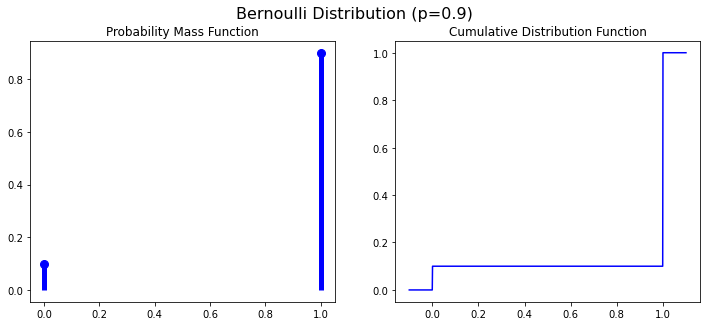

In [5]:
from scipy.stats import bernoulli

fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(12, 4.8))
fig.suptitle(f'Bernoulli Distribution (p={p})',fontsize=16)

xx = np.arange(2)
ax1.plot(xx, dist_bernoulli.pmf(xx), 'bo', ms=8)
ax1.vlines(xx, 0, dist_bernoulli.pmf(xx), color='b', lw=5)
ax1.set_title('Probability Mass Function')

xx = np.linspace(-0.10,1.1,1000)
ax2.plot(xx, dist_bernoulli.cdf(xx), 'b')
ax2.set_title('Cumulative Distribution Function')

#plt.savefig("bernoulli.pdf",bbox_inches="tight")
plt.show()

## Discrete: Binomial Distribution


**Parameters:**
- $n$: Number of trials
- $p$: Probability of outcome 1 (e.g. success)

**Examples / Usage:**
- tossing multiple coins
- number of defective parts in a batch


https://distribution-explorer.github.io/discrete/binomial.html


In [15]:
from scipy.stats import binom
n, p = 6, 1/2
dist_binom = binom(n,p)

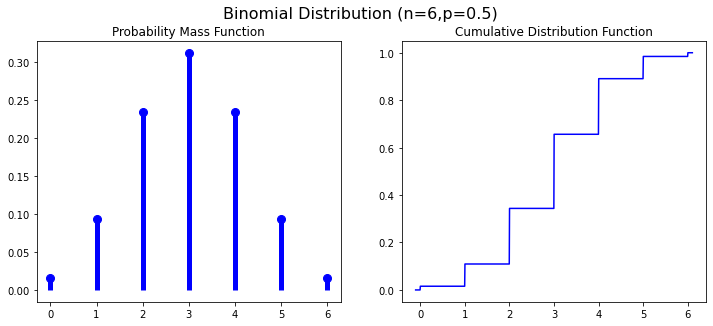

In [16]:

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12, 4.8))
fig.suptitle(f'Binomial Distribution (n={n},p={p})',fontsize=16)

xx = np.arange(dist_binom.ppf(0.01), dist_binom.ppf(1)+1)
ax1.plot(xx,dist_binom.pmf(xx), 'bo', ms=8)
ax1.vlines(xx, 0, dist_binom.pmf(xx), color='b', lw=5)
ax1.set_title('Probability Mass Function')

xx = np.linspace(dist_binom.ppf(0.01)-0.1, dist_binom.ppf(1)+0.1,1000)
ax2.plot(xx, dist_binom.cdf(xx), 'b')
ax2.set_title('Cumulative Distribution Function')

#plt.savefig("binomial.pdf",bbox_inches="tight")
plt.show()


**Excercise:** Experiment with different parameters of the Binomial Distribution! 

## (Continuous) Uniform Distribution

**Parameters:**
- lower bound
- upper bound

**Examples / Usage:**
- fundamental distribution for random number generation
- representing high uncertainty / no prior knowledge 



In [18]:
from scipy.stats import uniform

lower_bound, upper_bound = 0, 1

# scipy uses loc = lower_bound and scale = upper_bound-lower_bound
uniform_dist = uniform(loc=lower_bound, scale=upper_bound-lower_bound)


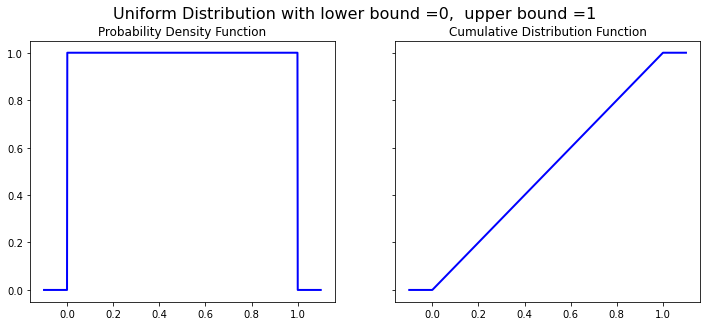

Expected value: 0.5, variance: 0.08333333333333333, standard deviation: 0.28867513459481287
Quantiles: 0.05: 0.05, 0.5(median): 0.5, 0.05: 0.95


In [19]:

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12, 4.8), sharey=True)
fig.suptitle(fr'Uniform Distribution with lower bound ={lower_bound},  upper bound ={upper_bound}',fontsize=16)

xx = np.linspace(lower_bound - 0.1, upper_bound+0.1, 1000)

ax1.plot(xx, uniform_dist.pdf(xx), linewidth=2, color='b')
ax1.set_title('Probability Density Function')

ax2.plot(xx, uniform_dist.cdf(xx), linewidth=2, color='b')
ax2.set_title('Cumulative Distribution Function')

#plt.savefig("uniform.pdf",bbox_inches="tight")

plt.show()

dist = uniform_dist

print(f'Expected value: {dist.mean()}, variance: {dist.var()}, standard deviation: {dist.std()}')
print (f'Quantiles: 0.05: {dist.ppf(0.05)}, 0.5(median): {dist.median()}, 0.05: {dist.ppf(0.95)}')


## Continuous: Normal (Gaussian) Distribution

**Parameters**
- $\mu$: expected value
- $\sigma$: standard deviation

**Examples / Usage:**
- results from summing up independent random variables (central limit theorem)
- often used as model for additive model error / residuals


https://distribution-explorer.github.io/continuous/normal.html



In [9]:
from scipy.stats import norm

loc = 0 # mean
scale = 1 # standard deviation

dist_normal = norm(loc,scale)

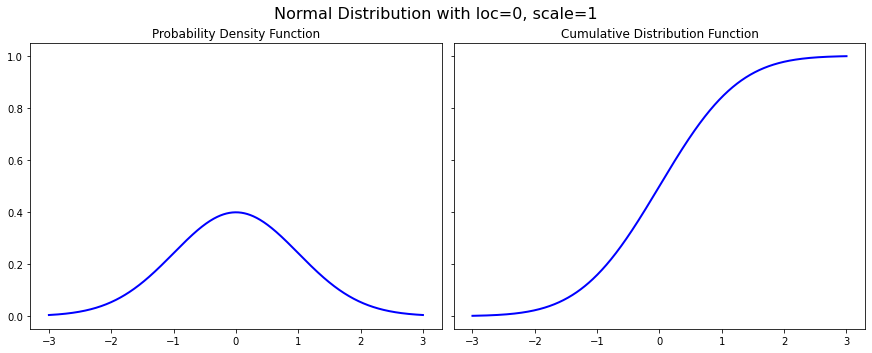

Expected value: 0.0, variance: 1.0, standard deviation: 1.0
Quantiles: 0.05: -1.6448536269514729, 0.5(median): 0.0, 0.05: 1.6448536269514722


In [10]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12, 4.8), constrained_layout=True, sharey=True)
fig.suptitle(f'Normal Distribution with loc={loc}, scale={scale}',fontsize=16)

xx = np.linspace(-3, 3, 1000)

ax1.plot(xx, dist_normal.pdf(xx), linewidth=2, color='b')
ax1.set_title('Probability Density Function')

ax2.plot(xx, dist_normal.cdf(xx), linewidth=2, color='b')
ax2.set_title('Cumulative Distribution Function')

#plt.savefig("normal.pdf",bbox_inches="tight")
plt.show()


dist = dist_normal

print(f'Expected value: {dist.mean()}, variance: {dist.var()}, standard deviation: {dist.std()}')
print (f'Quantiles: 0.05: {dist.ppf(0.05)}, 0.5(median): {dist.median()}, 0.05: {dist.ppf(0.95)}')

## Continuous: Exponential Distribution

**Parameters**
- $\lambda$: rate of events / arrival rate

**Examples / Usage:**
- time between events, e.g. time between machine failures or 
- inter-arrival time

https://distribution-explorer.github.io/continuous/exponential.html

In [11]:
from scipy.stats import expon

#parameters
lambd = 1.0

#always set loc = 0 when considering a non-shifted exponential distribution
# scipy uses 1/lambd instead of lambd as parameter
expon_dist = expon(loc=0, scale=1/lambd) 

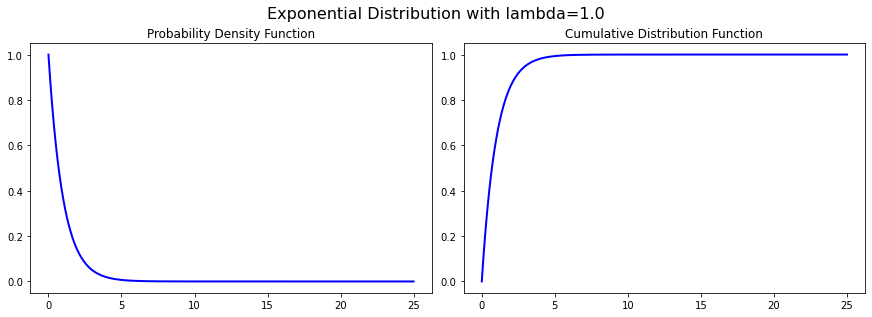

Expected value: 1.0, variance: 1.0, standard deviation: 1.0
Quantiles: 0.05: 0.051293294387550536, 0.5(median): 0.6931471805599453, 0.05: 2.99573227355399


In [12]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12, 4.3), constrained_layout=True)

fig.suptitle(fr'Exponential Distribution with lambda={lambd}',fontsize=16)

xx = np.linspace(1E-6, 25, 1000)

ax1.plot(xx, expon_dist.pdf(xx), linewidth=2, color='b')
ax1.set_title('Probability Density Function')

ax2.plot(xx, expon_dist.cdf(xx), linewidth=2, color='b')
ax2.set_title('Cumulative Distribution Function')

plt.savefig("expon.pdf",bbox_inches="tight")
plt.show()

dist = expon_dist

print(f'Expected value: {dist.mean()}, variance: {dist.var()}, standard deviation: {dist.std()}')
print (f'Quantiles: 0.05: {dist.ppf(0.05)}, 0.5(median): {dist.median()}, 0.05: {dist.ppf(0.95)}')

**Excercise:** Experiment with different parameters of the Exponential Distribution!

# Visual Probability Elicitation

## Assessing / Elicitating Probability Distributions
**Idea:** Turning the knowledge of subject matter experts into
probability distributions

- if we know the shapes of different distributions and some simple rules (e.g. regarding the allocation of the mass in the normal distribution), we may use these to guess a distribution
- in general, however, domain experts are not necessarily experts in
  stating probability distributions
- however, deriving distribution form expert knowledge can be trained
  and supported by well-established methods of **probability
  elicitation** and **calibration training**

**Examples**
- **Quantile-based approaches:** asking for quantiles estimates, e.g. quartiles, tertiles
- **Roulette approach:** distribute a number of "chips" across intervals/bins




### Subjective Probability Assement / Probability Elicitation

A set of online tools for subjective probability assement according to the so-called SHELF method can be found here:
http://optics.eee.nottingham.ac.uk/match/uncertainty.php
and:
https://jeremy-oakley.sites.sheffield.ac.uk/research/expert-elicitation

The methods behind these tools are explained in a scientic article: https://www.sciencedirect.com/science/article/pii/S1364815213002533

There is even a short online course on probility elicitation: http://www.tonyohagan.co.uk/shelf/ecourse.html

For more comprehensive information, see e.g. the book "Uncertain Judgements: Eliciting Experts' Probabilities" by Anthony O'Hagan et al.  https://onlinelibrary.wiley.com/doi/book/10.1002/0470033312


## The Roulette Method for Probability Elicitation

**Example:** Roulette method with web-tool *Shape*

$\rightarrow$ virtually placing chips into bins/intervals

<img src='img/RouletteAssess.png'>

http://optics.eee.nottingham.ac.uk/match/uncertainty.php


## The Roulette Method for Probability Elicitation

**Example:** Roulette method with web-tool *Shape*

- distribution that matches the chip placement best


<img src='img/RouletteResult.png'>

http://optics.eee.nottingham.ac.uk/match/uncertainty.php

## Case Study: Planning a night out

Your fourth friend Leo didn't participate in the bets, so you don't have data for him. In this case, you can make a subjective probability assessment - since you probably don't know Leo, just think of yourself or of one of your own friends.

You can use the online probability assessment tool Match (http://optics.eee.nottingham.ac.uk/match/uncertainty.php) for creating the distribution. Please make sure that you set the bounds in a plausible way before starting. You may choose any of the offered methods, e.g. the roulette method we mentioned above.
 

# Fitting Distributions from Data

## How can we use data?

- we can directly sample from data (**resampling**)
  - easy, reflects what happended
  - but: we need a lot of data and risk to overfit on the data
- we can fit a parametric probability model (distribution)
  - less risk of overfitting, parameters can be adapted for sensitivity analysis
  - sampling not only restricted to historical data
- we can use an empirical distribution
  - more flexible that parametric distributions
  - still some risk of overfitting to data
  
  

We'll use the following data sets for illustration

In [20]:

data1 = np.loadtxt('data/data1.txt')
data2 = np.loadtxt('data/data2.txt')
data3 = np.loadtxt('data/data3.txt')


# Assessing Data: Is a Single Distribution Appropriate?

## Before we use data: 

Fitting a distribution / resampling from data requires that the data is **independent
and identically distributed (i.i.d.)**

- independent from other variables and no serial dependencies (autocorrelation)
- the distribution is the same at each point in time (e.g. no trends or seasonalities)

$\rightarrow$ If the i.i.d assumtion does not hold, we need a more complex model (e.g. a timeseries model / a stochastic process)


## Checking IID Assumptions

Fitting a distribution from data requires that the data is **independent
and identically distributed (iid)**

- independent from other variables and no serial dependencies (autocorrelation)
- the distribution is the same at each point in time (e.g. no trends or seasonalities)

We can use visual approaches to explore these properties!


## Checking IID Assumptions: Serial Independence

**Serial independence** means that the previous observations do not have
a significant impact on the distribution of an observation

- autocorrelation plots show the correlation between "neighboring" observations
- the x-axis corresponds to the lags between the indexes of the observations


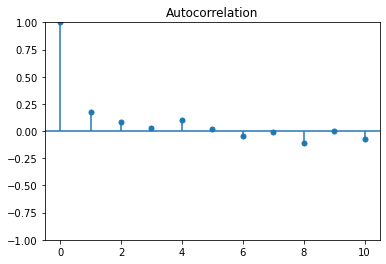

In [26]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(data2,lags=10,alpha=None);


**Excercise:** Plot the autocorrelation function for data setd data2 and data3!

##  Checking IID Assumptions: Identically Distributed
**Identically distributed** means that the distribution of the uncertain
quantity is the same no matter when it is observed

- we can check this by plotting the observations over time
- we may also add trend lines, e.g. using regression



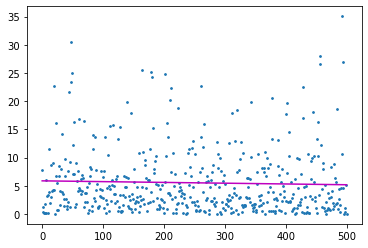

In [31]:
data = data2
xx = range(len(data))

plt.scatter(xx, data, s=3);

z = np.polyfit(xx, data, deg=1) # deg is the degree of the polynomial (1=linear)
p = np.poly1d(z)
plt.plot(xx, p(xx), 'm-');



**Excercise:** 
Plot the data points and a trend for data set data3! 

Think of the shape of the plotted data and the relation of the shape to the autocorrelation plot. 

For data3, try out different polynomials for the regression line!

# Fitting Parametric Distributions from i.i.d. Data

## Fitting Parametric Distributions from Data

**If we have data, we can use it for fitting a parametric distribution**

1. (Ensure that the data can be represented by a single distribution,
   that is, that it is independent and identically distributed (iid) <br>
   $\rightarrow$ if it is not, use a more complex model)   
2. Select a parametric distribution <br>
   $\rightarrow$ if there is no reasonable distribution, use empirical distribution 
3. Fit the distribution <br>
   $\rightarrow$ find the distributrion parameters yielding the best fit
4. Evaluate the goodness of fit  <br>
   $\rightarrow$ choose a different parametric or use empirical distribution


## Selecting a Parametric Distribution

A **histogram** can be viewed as an approximation of a probability
density function

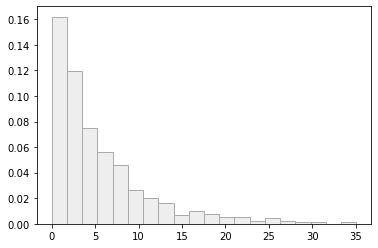

In [35]:

count, bins, ignored = plt.hist(data2, bins=20, density=True, color='#EEEEEE', edgecolor="#AAAAAA")


It may help us selecting a parametric distribution by comparing
- state space / support
- shape, e.g. symmetry, skewness, tail behavior

## Selecting a Parametric Distribution

In addition to a "visual" selection, we may ask ourselves if the
**assumptions behind the distribution** fit to our uncertain variable:
- does the variability result from additive influences?
- may outputs be negative?
- how likely are extreme outcomes?

For assumptions / stories behind some important distributions, see the
[distribution explorer](https://distribution-explorer.github.io) website mentioned above.

**Excercise:** Create histograms for the other two datasets!


## Fitting Parameters

Given a parametric distribution, the next step is to find the
parameters yielding the *best fit* to the data
- typically, we use **maximum likelihood estimates**
- that are implemented in packages such as Scipy.Stats


..but be careful: the best parameters for a given distribution do **not** imply that
the fit is good!


Example: Fitting an exponential distribution:

Estimated parameter lambda = 0.18


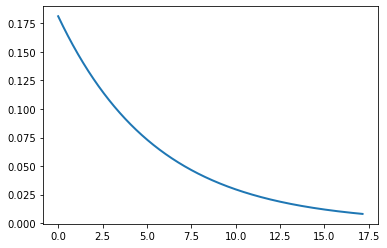

In [44]:
from scipy.stats import expon
params = expon.fit(data1, floc=0) #floc=0 forbids shifting on the x-axis

print(f"Estimated parameter lambda = {1/params[1]:0.2f}") #params[1] is scale (equals 1/lambda)

expon_dist = expon(*params)

xx = np.linspace(0,np.max(data)+0.1,1000)
plt.plot(xx, expon_dist.pdf(xx), linewidth=2);


## Evaluating goodness-of-fit

**Goal:** Check if the fitted distribution *is* a good fit



**Approach 1: Visually compare data to fitted distribution**





Text(0.5, 1.0, 'Empirical vs Fitted CDF')

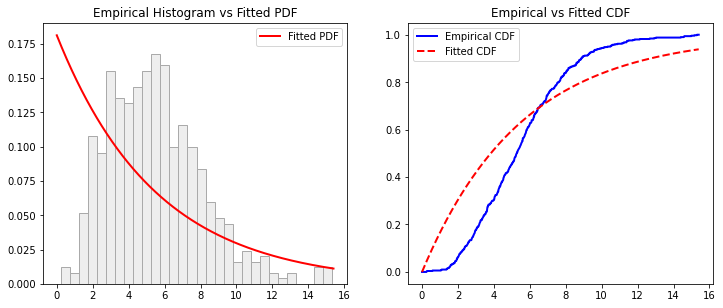

In [45]:
data = data1

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12, 4.8))
xx = np.linspace(0,np.max(data)+0.1,1000)
ax1.plot(xx, expon_dist.pdf(xx), linewidth=2, color="red", label="Fitted PDF")

ax1.set_title('Empirical Histogram vs Fitted PDF');
count, bins, ignored = ax1.hist(data, bins=30, density=True, color='#EEEEEE', edgecolor="#AAAAAA")
ax1.legend(loc=1);

from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(data)
ax2.plot(xx, ecdf(xx), 'b-', linewidth=2, label="Empirical CDF")
ax2.plot(xx, expon_dist.cdf(xx), 'r--', linewidth=2, label="Fitted CDF")
ax2.legend(loc=2);
ax2.set_title('Empirical vs Fitted CDF')

## Evaluating goodness-of-fit


**Approach 2: Statistical Goodness-of-Fit-Testing**

- For every possible distribution: Kolmogorov-Smirnov-test
  - in case of normal distribution: Shapiro-Wilk-test
- Null hypothesis: The data follows the tested
  distribution
- The tests usually return a *p-value*

$\rightarrow$ A p-value < $\alpha$ means that the test rejects the null hypothesis and thus means that it rejects the
distribution with a probability of $1- \alpha$

Example: for the fitted exponential distribution

In [46]:
level_of_significance = 0.05

p_value = stats.kstest(data1,'expon',args=params).pvalue

good_or_bad = 'bad' if p_value < level_of_significance else 'good'

print(f'The p value is {p_value:0.2f}. Given a significance level of {level_of_significance}, the distribution seems to be a {good_or_bad} fit'  )

The p value is 0.00. Given a significance level of 0.05, the distribution seems to be a bad fit



**Excercise:**

The Exponential distribution seems to be a good fit. Now try fitting the normal distribution, gamma distribution or the beta distribution and evaluate their fits!




**Excercise:**

The result of our iid checks was that data1 and data3 do not satisfy the iid assumptions (look above to verify this). Nonetheless, try fitting distributions and check if you find distributions for which the goodness-of-fit tests do not reject the fitted distributions!



## Case Study: Planning a night out

Assume that in the last year, you and your friends had a bet on who is the person being late most often, and to be able to decide that, you recorded lateness data (in minutes) for each of your meetings. The data is provided below, with a negative value indicating that a friend arrived before the designated meeting time.

You find 100 data points for three of your friends (Mary, Bob and Susan) below.

Plot the histograms of each data set (use 10 bins since we only have 100 data points), select a distribution you already encountered in one of the videos that matches the shape of the histogram and fit the parameters. Afterwards, evaluate the goodness of fit. You can assume that the data is iid. Compute the expected values for each of the distributions.

In [47]:
delays_mary = np.array([ 3.32014123e+00, -9.67098063e+00, 2.35842102e+00, 7.02330401e+00, 1.22700849e+01, -2.42490485e+00, -1.49666078e+01, 6.11740869e+00, 5.13562497e+00, 1.34950034e+01, -9.60407911e-01, 5.49943644e+00, 5.07242018e+00, 2.41309956e-02, 4.60450638e+00, 5.08672074e+00, -2.20154951e+01, -1.75173033e+01, 6.15112351e+00, -9.54471082e+00, 3.15884880e+00, 1.16492278e+01, -2.68543744e+00, -1.01695228e+01, -7.95717574e-01, 4.53047539e-01, 1.68928846e+00, 2.35296830e+01, -6.03174105e+00, -6.19072580e+00, 8.41514039e+00, -3.49757797e+00, 1.25504450e+01, 5.04423891e+00, 5.11121064e+00, -1.18134367e+00, 2.92960832e+00, -6.03763308e-01, 3.87285675e+00, 3.29870993e+00, 8.10144509e+00, -2.87492938e-03, -2.03524093e+00, 1.96343342e+01, -8.80338337e+00, -3.86774505e-01, 4.98624311e+00, 1.55262867e+01, 1.26915285e+01, 2.40439156e+00, -8.77566915e+00, 1.24399529e+01, -6.79125784e+00, -1.25706841e+01, 2.55732399e+01, 2.64107367e+00, 1.02658272e+01, 2.42252172e+00, -5.86199913e-02, 2.62056724e+00, 8.43885133e-01, 3.39407135e+00, 4.86987180e-01, -1.04936687e+00, 3.87583201e+00, 6.40025914e+00, 9.51883109e+00, 1.23677444e+01, 6.23503852e-01, 1.60759425e+01, 1.89662576e+01, -4.37047989e+00, 2.19782944e+01, -4.15766239e+00, -3.48288974e+00, -7.70652366e+00, 9.36956476e+00, -6.25473169e+00, 4.23813263e+00, 1.46061130e+01, 2.88354461e+01, 7.09792233e+00, 7.67652374e+00, 2.80712359e+01, 1.44003808e+01, -2.46924289e+00, 8.41726553e+00, -1.58436478e+00, -4.41454972e+00, 1.55742040e+01, 1.39837144e+00, -3.55693544e+00, 1.91297577e+00, 4.03830099e+00, 1.22190295e+01, 9.86833357e+00, 5.65192262e-01, -2.72996457e+00, 2.73653844e+01, -1.20559766e+01])

delays_bob = np.array([-19.78681595, -15.44299155, 2.67154477, -7.83493858, 4.00880527, 0.34025467, -28.47904732, 0.80555743, -5.30271539, -1.28037053, 10.25987346, -4.84178624, -4.03455494, 8.71769885, -15.89028396, 6.82717146, -36.46895519, 11.63411226, 8.05707033, -4.43840503, 26.21918555, 7.5470958 , 22.08189372, 19.93756014, 27.66556658, -7.04657282, 6.84144316, -19.94944023, 11.31037567, -39.51971805, 17.19224569, 0.78750812, 17.66800619, 26.71119959, 2.37344935, 24.39428877, 11.53783294, -9.30084091, -29.2457853 , 9.0023513 , -9.02150957, 5.95666611, 20.87398912, -6.70167581, 0.15255514, 4.59574557, -0.81257895, 31.84352344, -12.85049451, -2.19421409, 2.22386821, 11.71979073, -30.1834824 , 13.28038749, -0.72872073, -10.06521312, 1.1289978 , 7.2094995 , -1.5559774 , -5.27891806, -6.39270753, 2.60547607, -30.06011714, -3.60528318, 15.64552365, 13.91533729, -1.41838155, -1.51941176, 21.5289577 , -39.09871775, 9.52722842, -3.43963765, -18.39921995, -6.71566329, -6.49729967, 26.04157866, -26.66060035, 5.23707034, -0.92118503, 12.87019353, -8.41391006, -2.38828899, 25.87994954, 22.39060771, 10.64073125, -18.84156722, -27.20620871, 21.25568474, 11.7725902 , 20.87086477, 22.38714617, -3.42738566, 13.31128297, -32.20117816, 19.29887748, 8.02759135, 46.64157277, 15.71216697, -4.43816966, -0.36918591])

delays_susan = np.array([ 8.74527638, 2.25909861, 0.80659952, 2.85370853, 14.8604216 , 8.0257344 , 10.98851503, 5.4014817 , 17.80523127, 5.89811625, 1.28227347, 1.82915289, 0.49622237, 8.52235799, 3.99821157, 11.39059599, 16.06342554, 4.80378808, 4.3592862 , 0.13370344, 3.28169158, 3.85831434, 23.7692892 , 0.59277324, 0.76401746, 5.52034948, 2.88981186, 11.40753913, 6.20590656, 6.19567553, 0.06911148, 18.23919452, 0.54041839, 9.93554691, 1.16328045, 12.62642981, 1.34872161, 3.12734727, 0.48580896, 0.53570645, 0.75486399, 15.0714803 , 1.15650394, 17.21651547, 15.30896805, 0.79348048, 0.79291726, 7.80350474, 1.10739541, 1.22069739, 3.14468496, 2.9326338 , 14.34572917, 1.82180059, 23.60517282, 1.63481223, 16.45558702, 1.70007469, 0.46412416, 1.46717318, 1.56009239, 0.59331706, 4.4650805 , 16.01246056, 0.32034881, 4.64753206, 1.85373041, 0.19314866, 1.97092659, 25.24471519, 0.66432842, 0.92604989, 2.91199795, 0.5156231 , 1.42717931, 2.00299388, 1.51957868, 0.3029704 , 0.74386835, 3.72284483, 14.87828075, 3.56512795, 9.17597987, 15.04203998, 10.67693831, 2.73869525, 13.27452711, 0.10215095, 12.54041192, 0.05518983, 9.85177033, 3.71303105, 4.79944687, 2.85525066, 9.42258761, 0.10544078, 4.28444945, 1.29827093, 3.61559973, 10.04668101])

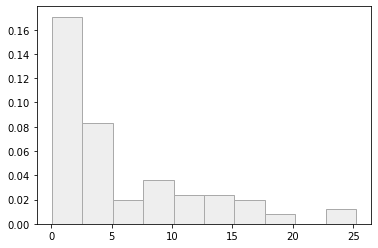

In [64]:
avg_mary = np.mean(delays_mary)
avg_bob = np.mean(delays_bob)
avg_susan = np.mean(delays_susan)


count, bins, ignored = plt.hist(delays_susan, bins=10, density=True, color='#EEEEEE', edgecolor="#AAAAAA")


Text(0.5, 1.0, 'Empirical vs Fitted CDF')

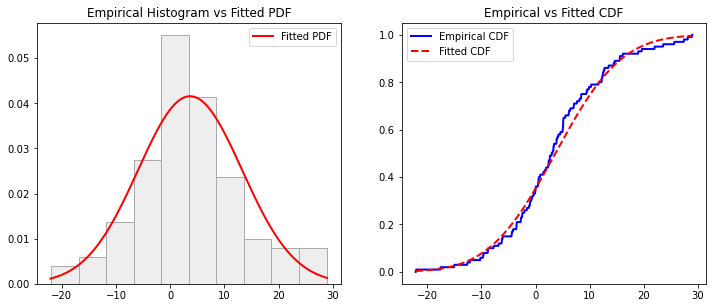

In [65]:
from scipy.stats import norm

params_mary = norm.fit(delays_mary)
dist_mary = norm(*params_mary)


fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12, 4.8))
xx = np.linspace(np.min(delays_mary) - 0.1,np.max(delays_mary)+0.1,1000)
ax1.plot(xx, dist_mary.pdf(xx), linewidth=2, color="red", label="Fitted PDF")

ax1.set_title('Empirical Histogram vs Fitted PDF');
count, bins, ignored = ax1.hist(delays_mary, bins=10, density=True, color='#EEEEEE', edgecolor="#AAAAAA")
ax1.legend(loc=1);

from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(delays_mary)
ax2.plot(xx, ecdf(xx), 'b-', linewidth=2, label="Empirical CDF")
ax2.plot(xx, dist_mary.cdf(xx), 'r--', linewidth=2, label="Fitted CDF")
ax2.legend(loc=2);
ax2.set_title('Empirical vs Fitted CDF')

Text(0.5, 1.0, 'Empirical vs Fitted CDF')

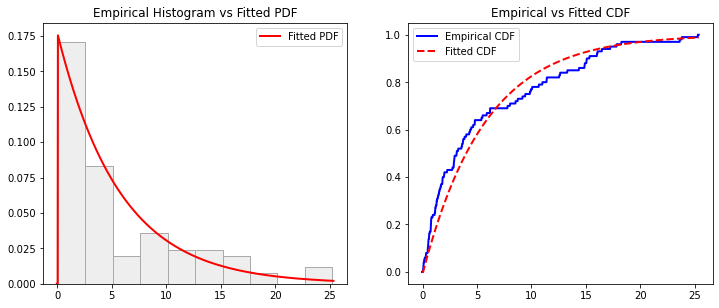

In [66]:
params_bob = norm.fit(delays_bob)
dist_bob = norm(*params_bob)

params_susan = expon.fit(delays_susan)
dist_susan = expon(*params_susan)


fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12, 4.8))
xx = np.linspace(np.min(delays_susan) - 0.1,np.max(delays_susan)+0.1,1000)
ax1.plot(xx, dist_susan.pdf(xx), linewidth=2, color="red", label="Fitted PDF")

ax1.set_title('Empirical Histogram vs Fitted PDF');
count, bins, ignored = ax1.hist(delays_susan, bins=10, density=True, color='#EEEEEE', edgecolor="#AAAAAA")
ax1.legend(loc=1);

from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(delays_susan)
ax2.plot(xx, ecdf(xx), 'b-', linewidth=2, label="Empirical CDF")
ax2.plot(xx, dist_susan.cdf(xx), 'r--', linewidth=2, label="Fitted CDF")
ax2.legend(loc=2);
ax2.set_title('Empirical vs Fitted CDF')

# Using Empirical / Parameter-Free Distributions

## Empirical / Parameter-free distributions

**If we don't find a good parametric distribution**:

- we may use a parameter-free / empirical distribution
- we fit a density function without assuming a distribution model
- technically, we may use e.g. kernel density estimation <br>
  in Python: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html
  

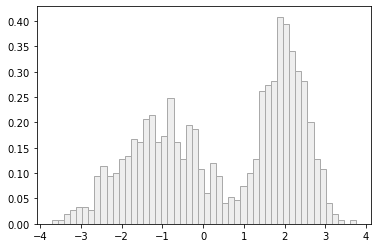

In [67]:

# creating data with two peaks
sampD1 = norm.rvs(loc=-1.0,scale=1,size=500)
sampD2 = norm.rvs(loc=2.0,scale=0.5,size=500)
samp = np.hstack([sampD1,sampD2])

# plotting the histogram
count, bins, ignored = plt.hist(samp, 50, density=True, color='#EEEEEE', edgecolor="#AAAAAA");


Then, we use the parameter free gaussian kernel denisity estimation from scipy.stats to create a parameter-free distribution:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html

C:\Users\mroemer\AppData\Local\Temp\ipykernel_23696\795431380.py:1: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  from scipy.stats.kde import gaussian_kde


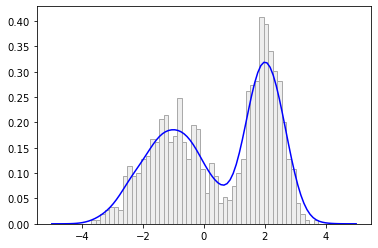

In [72]:
from scipy.stats.kde import gaussian_kde

# obtaining the pdf (my_pdf is a function!)
empirical_pdf = gaussian_kde(samp, bw_method=0.2 ) # parameter adapts the fit bw_method

# plotting the result
x = np.linspace(-5,5,100)
plt.plot(x,empirical_pdf(x),'b') # distribution function
count, bins, ignored = plt.hist(samp, 50, density=True, color='#EEEEEE', edgecolor="#AAAAAA");


**Excercise** 

The fit of the gaussian kde can be adjusted with the bandwidth parameter bw_method. Experiment with different settings of this parameter between 0 and 2 and see the effect on the fit.

## Empirical Discrete Distribution

We can define an emiprical disrete distribution in which we have a discrete sample space, e.g. a sequence of integers from 0 to 6 and a **probability** for each of the integers.

This generic distribution can be used to represent an **discrete** empirical distribution obtained from historical data.

In [73]:
from scipy.stats import rv_discrete

# distribution parameters
# xk is the sample space, pk contains the probability for each outcome
xk = np.arange(7)
pk = (0.1, 0.2, 0.3, 0.1, 0.1, 0.0, 0.2)

custom_dist = rv_discrete(name='custom', values=(xk, pk))

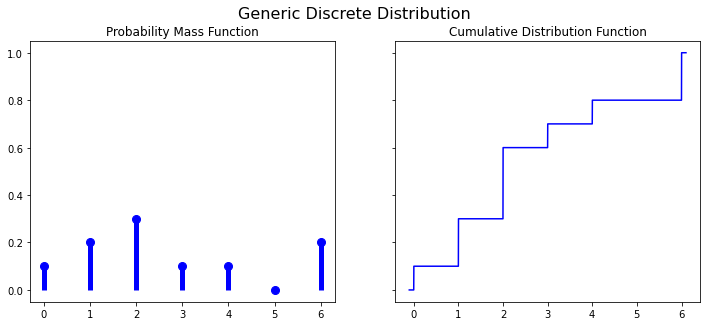

In [74]:

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12, 4.8), sharey=True)
fig.suptitle('Generic Discrete Distribution',fontsize=16)

ax1.plot(xk, custom_dist.pmf(xk), 'bo', ms=8, mec='b')
ax1.vlines(xk, 0, custom_dist.pmf(xk), color='b', lw=5)
ax1.set_title('Probability Mass Function')

xx = np.linspace(-0.1,6.1,10000)
ax2.plot(xx, custom_dist.cdf(xx), 'b')
ax2.set_title('Cumulative Distribution Function');



# Finishing the Case Study

## Completing the Case Study

Given the uncertainty in the data, you suspect that your group of friends most likely will not be at your place on time so that you can leave together and make to the cinema.

You think you might better plan with some buffer, that is, you tell your friends to be at your place *before* you actually intend to actually leave. Your first idea is to determine that buffer based on the expected arrival times of your friends: 
If you assume that each of your friends arrives with his or her expected delay, with how much delay would your group be complete so that you can leave?

In [76]:
def get_delay(delay_mary, delay_bob, delay_susan):
    return max(delay_mary, delay_bob, delay_susan)


get_delay(np.mean(delays_mary), np.mean(delays_bob), np.mean(delays_susan))

5.7551891209

## The Flaw of Averages and Monte-Carlo Simulation

Since you heard about the Flaw of Averages, you think that your buffer calculation based on expected may not be the best idea.

Use Monte-Carlo simulation to to estimate the true expected delay of the group based on the delay distributions approximated above. You may first conduct a "historical" simulation assuming that each of the 100 observation from each person was drawn on the same day


Then, compare the two values and compute the error caused by the Flaw of Averages!

In [78]:
## historical simulation
## 1: for-loop

total_delays = np.empty(100)

for i in range(100):
    total_delays[i] = get_delay(delays_mary[i], delays_bob[i], delays_susan[i])

np.mean(total_delays)

# 2: Vectorization
from numba import vectorize
@vectorize
def get_delay(delay_mary, delay_bob, delay_susan):
    return max(delay_mary, delay_bob, delay_susan)
total_delays = get_delay(delays_mary, delays_bob, delays_susan)

np.mean(total_delays)

12.809123394

Plot the histogram of the delay distribution to get a feeling of the delay uncertainty.

Compute the probability that your group starts later than the buffer based on the expected-value calculation.

How much buffer should you use for scheduling the meeting time if you wish that everyone is there at the desired time with a probability of 90%? 

# Probabilistic Machine Learning Models


## Motivation

So far, we
- discussed how to obtain probability distributions from data
- learned that fitting a single distribution requires the i.i.d. assumption

What if this assumption does not hold?
- we will need more complex models, e.g. probabilistic machine learning models
- we will consider the first data set (data1) here

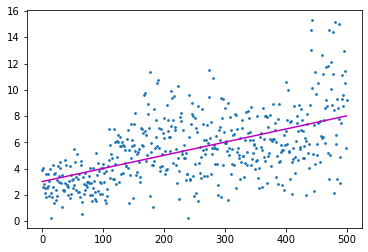

In [79]:

data1 = np.loadtxt('data/data1.txt')


data = data1

xx = range(len(data))

plt.scatter(xx, data, s=3);

z = np.polyfit(xx, data, deg=1) # deg is the degree of the polynomial (1=linear)
p = np.poly1d(z)
plt.plot(xx, p(xx), 'm-');


# Probabilistic Machine Learning Models: Overview


In remainder of this meeting, we  will see how to use Data Science models to handle (certain) non-i.i.d. cases

We will:
- shortly review basic of Machine Learning
- see how to obtain **probabilisitic** predictions 
  - from classification and
  - regression models
  




##  Supervised vs unsupervised learning


**Unsupervised Learning**
- data points only contain features
- the goal is to identify relations / associations between data points
- prominent examples: clustering, market basket analyis


**Supervised Learning**
- "learning from examples"
- each data point contains
  - attributes / features **and**
  - quantities / labels to be predicted



## Supervised Learning: Classification vs Regression

**Classification:**
- categorical labels
- predicting which class / which category

**Regression:**
- (continous) numerical labels
- predicting how much / how many

## Classification: Single Class vs  Probabilities

- in classification, we typically predict the best or **most likely** class or category
- for decision making, it is often useful to know the **probability of each class**
- then, we can consider the outcome of a (probabilistic) classification as a **discrete probability distribution**

Most tools for classification can also output these probabilities
- e.g. in scikit-learn, there is `predict_proba`




## Example: Classifying Cancer Cells

Let us consider a data set with data containing features of breast cancer tumors and their classification as *malignant* or *beningn*. (The data set comes with scikit-learn)


In [81]:
import sklearn
from sklearn.datasets import load_breast_cancer

from sklearn.naive_bayes import GaussianNB
  
data = load_breast_cancer()
label_names = data['target_names']
labels = data['target']
feature_names = data['feature_names']
features = data['data'];

In [82]:
print ("The first features: ", feature_names[0:4])
print ("Labels: " , label_names)

The first features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area']
Labels:  ['malignant' 'benign']


In [84]:
# For learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

 We split the data into a train- and a test set and train a **naïve Bayes** classifier with scikit-learn to predict the nature of the tumor from the features.
 
 It seems to work pretty well:

In [85]:
from sklearn.model_selection import train_test_split
train, test, train_labels, test_labels = train_test_split(features, labels,
                                       test_size = 0.33, random_state = 42)
gnb = GaussianNB()
model = gnb.fit(train, train_labels)
predictions = gnb.predict(test)
print(f"The accuray score of our model is: { accuracy_score(test_labels, predictions):0.2f} ")

The accuray score of our model is: 0.94 


This looks pretty good. Do we really need probabilistic forecasts?

## Example: Quantifying Uncertainty

**But what does this mean for a given patient?**
- some cases are very clear, others not!
- it can be very useful if the classifier **quantifies its own uncertainty**
- in scikit-learn we can use the method `predict_proba` to obtain 

In [87]:
probabilistic_predictions = gnb.predict_proba(test)

**Let us consider two patient cases with the same prediction (benign)**

Let us consider the first patient:


In [88]:
patient = 0
prediction = predictions[patient]
probability = probabilistic_predictions[patient][prediction]
print(f"The prediction is that the tumor is {label_names[prediction]} with probability {probability:0.2f}")

The prediction is that the tumor is benign with probability 1.00



Now, let us consider the patient with index 8:

In [89]:
patient = 8
prediction = predictions[patient]
probability = probabilistic_predictions[patient][prediction]
print(f"The prediction is that the tumor is {label_names[prediction]} with probability {probability:0.2f}")

The prediction is that the tumor is benign with probability 0.55


The latter patient may thus consider a more detailed investigation...

## Example: Predicting Length-of-stay in Intensive Care Units (ICUs) 

In  research project in collaboration with EvKB (Bethel), we used probabilistic classification to predict the length of stay of patients in ICU:
- 1 day, 2 days, 3 days, 4 or more days
from patient health metrics
- e.g. heart rate, blood pressure, medication, ...

Along with distributions for emergency cases, we used these predictions for every ICU in a Monte Carlo Simulation 
- for predicting the daily distribution of ICU occupancy
- for supporting decisions regarding elecitive surgeries that lead to ICU stays


## Regression

For regession models, sklearn does not generally provide the option to predict distributions

In general, **what do we mean with probabilitstic regression?**

- if $y$ is the (numeric) label and $\textbf{x}=x_1,..x_n$ is a given  feature vector, then a probabilistic regression model gives us a distribution $Y$ that is conditioned on the features: $Y | \textbf{x}$  

In a **classical linear regression** (based on ordinary least squares (OLS)):
- $Y$ is a **normal distribution** (in this context often called the residual distribution)
- the (point forecast) $y$ is the mean, and the standard deviation $\sigma$ can be estimated from the data
- interestingly, for the case of (simple) linear regression, the OLS estimate is also the so-called maximum likelihood estimator

## Linear Regression: Example Data Set

Let us now consider the data set 1.
- it has 500 data points
- let us assume that they represent weeks



## Linear Regression for the  Example Data Set

We can use the linear regression model from scikit-learn:


In [90]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

- then our labels $y$ are the data points and
- the (time) indexes of the array are the features $x$
  - note that sklearn expects a feature matrix, thus we need to wrap the indexes into a matrix

In [92]:
y_data1 = data1
time_indices = np.arange(1,len(data1)+1)
# note that we create a two-dimensinal array since sklearn expects this
x_data1 = np.expand_dims(time_indices, axis=1)


Now, we can fit the model to the data

In [93]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(x_data1,y_data1)
print ("Intercept: ",linear_model.intercept_ )
print ("Coefficients: ",linear_model.coef_)

Intercept:  3.0092353926972417
Coefficients:  [0.01001925]


And use it for (point) prediction:

In [94]:
linear_model.predict([[600]])

array([9.02078774])

## Generalized Linear Models

(Standard) linear regression is a special case of **generalized linear models** where
- residuals can stem from various distributions from the exponential family
- link functions are used to connect the linear predictor to the expected value of the distribution
- models are estimated based on **maximum likelikhood**

However, in Python, both scikit-learn and statsmodels provide GLMs, but:
- **both do not provide a convenient way for obtaining the predictive distribution and sampling**
- e.g. in form of distribution objects

## NGBoost

- so, it seems that probabilistic regression is a bit hard to do in Python..

...fortunately, however there  are some
- **simple-to-use packages** that
- **support probabilistic regression**
- with a **scikit-learn-style API**

For example,
- **N**atural **G**radient **Boost**ing
- provides probilistic prediction (classification **and** regression) with boosting ensembles
- returns scipy-stats-like distribution objects

## Using NGBoost for Probabilistic Regression: Model Fitting

- use `NGBRegressor` as model object (just like any sklearn-Regressor)
- specify the **distribution model** of the (conditional) distribution to predict:
  - Normal,
  - LogNormal or
  - Exponential
- call the `fit` function

In [95]:
from ngboost import NGBRegressor, distns
ngb_model = NGBRegressor(Dist=distns.Exponential).fit(x_data1, y_data1)

[iter 0] loss=2.7082 val_loss=0.0000 scale=2.0000 norm=0.7475
[iter 100] loss=2.6534 val_loss=0.0000 scale=2.0000 norm=0.5377
[iter 200] loss=2.6471 val_loss=0.0000 scale=2.0000 norm=0.5126
[iter 300] loss=2.6433 val_loss=0.0000 scale=2.0000 norm=0.4963
[iter 400] loss=2.6400 val_loss=0.0000 scale=2.0000 norm=0.4843


## Using NGBoost for Probabilistic Regression: Prediction

Given the Regressor-Object, we can call
- the `predict`-methd to get a **point forecast**:
 

In [96]:
x_value_to_predict = 600

feature_matrix_for_prediction = [[x_value_to_predict]] # we need to wrap this into a matrix

point_forecast = ngb_model.predict(feature_matrix_for_prediction)[0]

point_forecast

8.767327442224857

- or the `pred_dist` to get a **probabilistic forecast**
- returns a scipy-stats distribution object

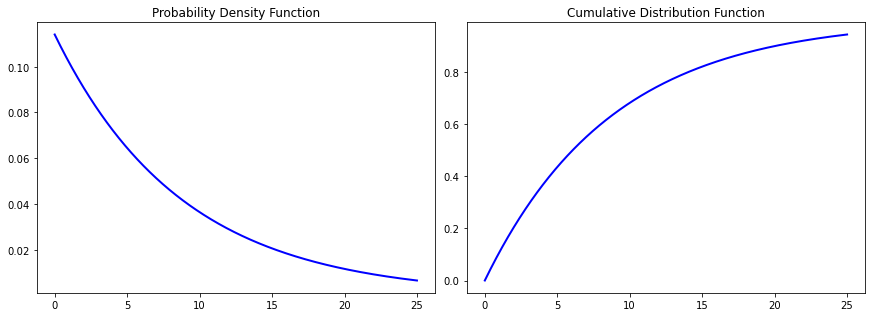

In [97]:
distribution_forecast = ngb_model.pred_dist(feature_matrix_for_prediction)[0]

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12, 4.3), constrained_layout=True)

xx = np.linspace(1E-6, 25, 1000)
ax1.plot(xx, distribution_forecast.pdf(xx), linewidth=2, color='b')
ax1.set_title('Probability Density Function')
ax2.plot(xx, distribution_forecast.cdf(xx), linewidth=2, color='b')
ax2.set_title('Cumulative Distribution Function')


plt.show()


## Assessing the Model using Log Likelihood

One way to assess the goodness of fit is to use the so-called *negative log likelihood*.

- the smaller the negative log likelihood, the better the fit.

In [ ]:
pred_dists_original_data = ngb_model.pred_dist( x_data1 )

negative_ll = -pred_dists_original_data.logpdf(y_data1).mean()
print('Average Negative Log Likelihood', negative_ll)

**Excercise:** Change the distribution in NGBoost to Normal and see if the fit improves!

## Summary

In this meeting, we learned how to obtain probability distributions from data:

- fitting distributions to simple homogeneous i.i.d. data
- simple approaches for checking the i.i.d. assumptions
- using probabilistic machine learning to obtain conditional distributions in more complex settings

Next time, we will deal with distributions resulting from decision-making under uncertainty!